In [1]:
import anndata as ad
import scanpy as sc
import squidpy as sq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import stats

import seaborn as sns
import matplotlib.colors as mcolors

In [2]:
data_list = ["./RNA/B924-1.guide.bin_100.h5", "./RNA/B926-1.guide.bin_100.h5", "./RNA/B922-1.guide.bin_100.h5",
             "./RNA/B924-2.guide.bin_100.h5", "./RNA/B926-2.guide.bin_100.h5", "./RNA/B922-2.guide.bin_100.h5"]
marker = ["1-1", "2-1", "3-1", "1-2", "2-2", "3-2"]

In [3]:
anndata_list = []
for idx, data in enumerate(data_list):
    anndata_ = sc.read_h5ad(data)
    anndata_.obs["marker"] = marker[idx]
    anndata_list.append(anndata_)

guide_data = ad.concat(anndata_list)
guide_data.obs_names_make_unique()

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [4]:
count_df = pd.DataFrame(guide_data.X.toarray(), columns=guide_data.var_names.tolist())
count_df["marker"] = guide_data.obs["marker"].tolist()
count_df.groupby("marker").sum()

,sgAdrb2_1_gene,sgAdrb2_2_gene,sgAqp3_1_gene,sgAqp3_2_gene,sgArntl_1_gene,sgArntl_2_gene,sgCd44_1_gene,sgCd44_2_gene,sgCd52_1_gene,sgCd52_2_gene,...,sgTmem64_1_gene,sgTmem64_2_gene,sgWipf1_1_gene,sgWipf1_2_gene,sgZc3h12a_1_gene,sgZc3h12a_2_gene,sgZhx2_1_gene,sgZhx2_2_gene,sgZscan12_1_gene,sgZscan12_2_gene
marker,,,,,,,,,,,,,,,,,,,,,
1-1,3485,6462,239,1339,756,5688,1963,3440,922,5275,...,7739,638,2870,1220,3519,4972,2527,7761,3800,3540
1-2,1789,13020,8855,3625,7496,838,980,413,8879,12091,...,18592,5172,15792,1168,9590,13720,17315,17379,7294,5921
2-1,2996,4242,2076,2246,1496,2760,2673,2361,2252,2499,...,5287,3352,2653,2229,15935,14614,5349,4882,3103,3431
2-2,1420,5163,8291,1505,1794,1748,2267,4383,2179,5641,...,7718,4193,6265,1263,46302,42217,8612,9392,4690,2370
3-1,35,307,324,17,35,109,15,9,26,236,...,686,317,1106,104,1111,2611,637,57,467,102
3-2,271,438,299,21,114,91,40,37,2758,691,...,797,2215,2248,1548,10309,9989,4781,3469,1944,39


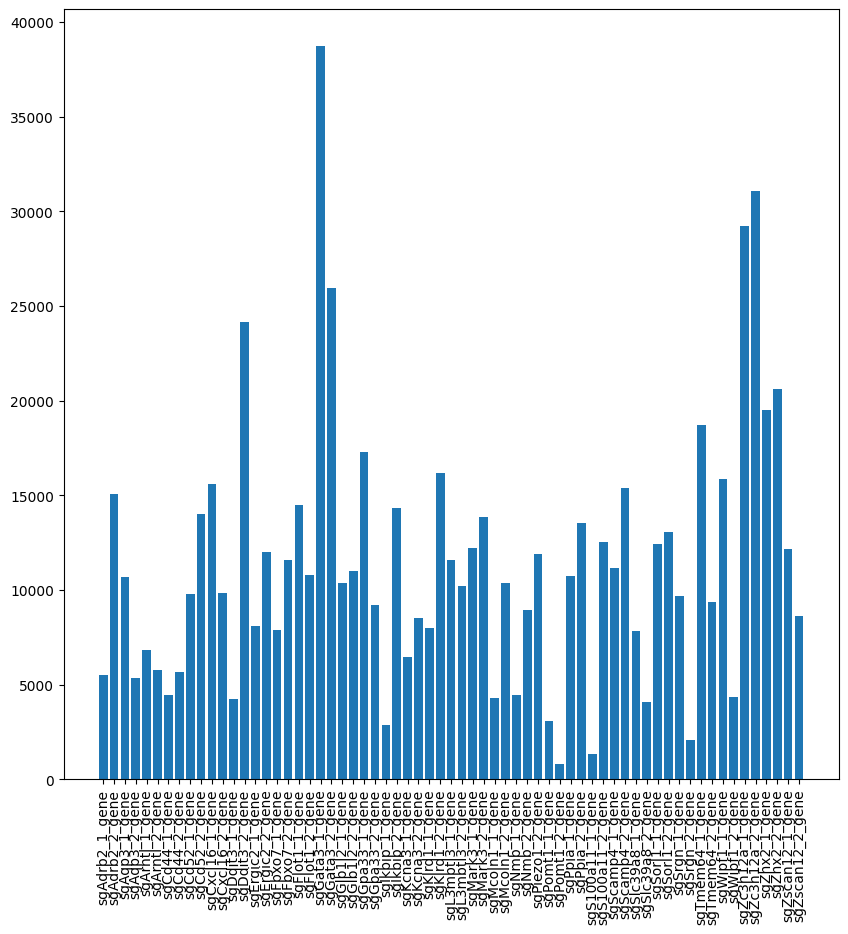

In [14]:
plt.figure(figsize=(10, 10))
plt.bar(count_df.columns[:-1], (count_df.iloc[:, :-1] > 0).sum(axis=0).tolist())
plt.xticks(rotation=90)
plt.show()

# bin 1

In [39]:
df1_1 = pd.read_csv("./gRNA/B922/C03628E2.gem.offset", header=0, sep="\t", index_col=0)
df2_1 = pd.read_csv("./gRNA/B924/C03628A1.gem.offset", header=0, sep="\t", index_col=0)
df3_1 = pd.read_csv("./gRNA/B926/D03658A5.gem.offset", header=0, sep="\t", index_col=0)

In [44]:
_df = pd.concat([df1_1.groupby('geneID').count()["x"], df2_1.groupby('geneID').count()["x"], df3_1.groupby('geneID').count()["x"]], axis=1)

In [46]:
df1_2 = pd.read_csv("./gRNA/B922/D03658A1.gem.offset", header=None, sep="\t", index_col=0)
df2_2 = pd.read_csv("./gRNA/B924/D03658A3.gem.offset", header=None, sep="\t", index_col=0)
df3_2 = pd.read_csv("./gRNA/B926/D03658A6.gem.offset", header=None, sep="\t", index_col=0)

In [47]:
_df = pd.concat([_df, df1_2.groupby(0).count()[1], df2_2.groupby(0).count()[1], df3_2.groupby(0).count()[1]], axis=1)

In [49]:
_df.columns = ["B922-1", "B922-2", "B924-1", "B924-2", "B926-1", "B926-2"]

In [54]:
import seaborn as sns

In [69]:
_df = _df.fillna(0).astype(int)

In [114]:
_df

,B922-1,B922-2,B924-1,B924-2,B926-1,B926-2,Gene
Gene,,,,,,,
sgAdrb2_1_gene,282,1598,987,20,1975,1474,sgAdrb2_1_gene
sgAdrb2_2_gene,505,10736,4221,155,3359,2009,sgAdrb2_2_gene
sgAqp3_1_gene,359,7654,6164,153,147,994,sgAqp3_1_gene
sgAqp3_2_gene,33,3264,1151,10,813,1228,sgAqp3_2_gene
sgArntl_1_gene,134,6340,1341,22,414,832,sgArntl_1_gene
...,...,...,...,...,...,...,...
sgZscan12_2_gene,52,5455,1738,48,1831,1649,sgZscan12_2_gene
sgnon-targeting_1_gene,241,5021,5097,0,315,699,sgnon-targeting_1_gene
sgnon-targeting_2_gene,4050,19356,19866,0,4873,3756,sgnon-targeting_2_gene


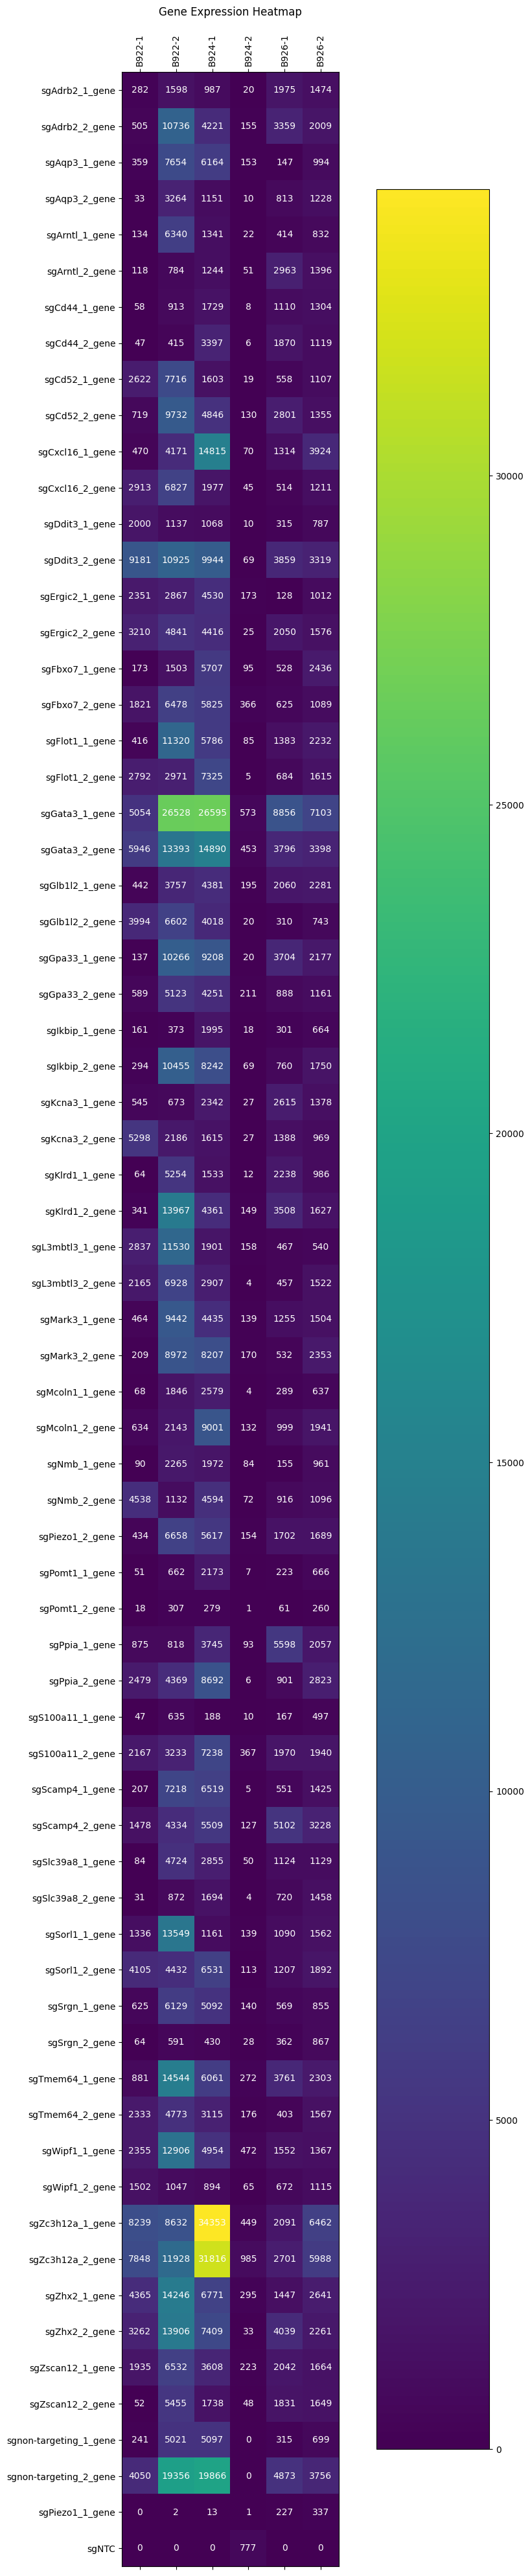

In [123]:
_df["Gene"] = _df.index
# 设置 Gene 列为索引
_df.set_index('Gene', inplace=True)

# 绘制热图
fig, ax = plt.subplots(figsize=(15, 50))
cax = ax.matshow(_df, cmap='viridis')

# 在热图上标注值
for (i, j), val in np.ndenumerate(_df.values):
    ax.text(j, i, f'{val}', ha='center', va='center', color='white')

# 设置x轴和y轴标签
ax.set_xticks(np.arange(len(_df.columns)))
ax.set_yticks(np.arange(len(_df.index)))
ax.set_xticklabels(_df.columns, rotation=90)
ax.set_yticklabels(_df.index)

# 添加颜色条
fig.colorbar(cax)

# 设置标题
plt.title('Gene Expression Heatmap', pad=20)

# 显示图表
plt.show()